In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")
print(tips.head())

# 2. 그래프 스타일 설정
sns.set_style("darkgrid")

# 3. 요일별 distplot/histplot 그리기
days = tips["day"].unique()
for day in days:
    subset = tips[tips["day"] == day]
    sns.distplot(subset["tip"], kde=True, label=day)

plt.title("요일별 팁 분포")
plt.xlabel("Tip")
plt.ylabel("Density")
plt.legend()
plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


D:\anaconda3\envs\pytorch_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\envs\pytorch_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\envs\pytorch_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\envs\pytorch_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\envs\pytorch_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **k

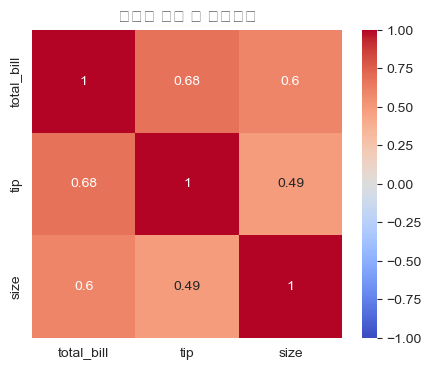

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 2. 숫자형 변수만 골라서 새로운 데이터프레임 생성
num_cols = ["total_bill", "tip", "size"]
heatmap_data = tips[num_cols]

# 3. 상관계수 계산
corr_matrix = heatmap_data.corr()

# 4. 히트맵 시각화
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("숫자형 변수 간 상관관계")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           9.67e-34
Time:                        12:46:49   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

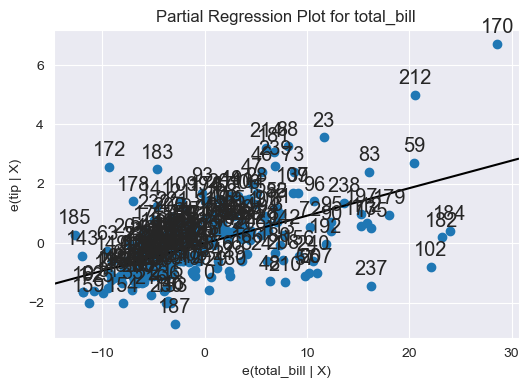

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 2. 독립 변수와 종속 변수 분리
X = tips[["total_bill", "size"]]
y = tips["tip"]

# 3. 상수항 추가
X = sm.add_constant(X)

# 4. OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()
print(model.summary())

# 5. 부분 회귀 플롯(Partial Regression Plot)
fig, ax = plt.subplots(figsize=(6, 4))
plot_partregress("tip", "total_bill", ["size"], data=tips, ax=ax)
plt.title("Partial Regression Plot for total_bill")
plt.show()